In [148]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Clean horse racing file
clean_race = 'clean.csv'

#Read csv
clean = pd.read_csv(clean_race)
clean

,race_date,race_city,race_no,race_type,race_sex_group,race_age_group,race_race_group,race_length,race_track_type,race_track_condition,...,horse_trainer,horse_race_degree,horse_win_value,horse_psf_rate,horse_psf_rank,Horse_starting_box_no,horse_margin,horse_late_start,horse_rate,unique_race_identifier
0,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,TAMER TURAN,1.31.26,1.50,49,1,1,9 Lengths,NaN,42,2024-01-01_Bursa_1
1,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,TUNCAY PELEN,1.33.05,3.75,20,2,4,Half Lengths,NaN,43,2024-01-01_Bursa_1
2,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,KAZIM ŞENGEL,1.33.17,28.70,3,6,3,3 Lengths,NaN,33,2024-01-01_Bursa_1
3,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,ALİ RIZA AYDIN,1.33.65,14.85,3,5,6,4 Lengths,NaN,39,2024-01-01_Bursa_1
4,2024-01-01,Bursa,1,Condition 2,Undefined,3 Years Old,English,1400,Dirt,Good Going,...,MURAT TÜRKOĞLU,1.34.30,4.55,17,3,5,NaN,NaN,51,2024-01-01_Bursa_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278,2024-01-31,Şanlıurfa,8,Handicap 14,Undefined,4 Years Old,Arabian,1700,Dirt,Good Going,...,YELİZ BAYSAL,2.17.56,20.50,3,11,7,NaN,NaN,42,2024-01-31_Şanlıurfa_8
4279,2024-01-31,Şanlıurfa,8,Handicap 14,Undefined,4 Years Old,Arabian,1700,Dirt,Good Going,...,MAHSUM BARCİN,2.17.92,34.90,2,14,8,NaN,NaN,32,2024-01-31_Şanlıurfa_8
4280,2024-01-31,Şanlıurfa,8,Handicap 14,Undefined,4 Years Old,Arabian,1700,Dirt,Good Going,...,MURAT ALTIN,2.18.09,9.45,5,7,6,NaN,NaN,34,2024-01-31_Şanlıurfa_8
4281,2024-01-31,Şanlıurfa,8,Handicap 14,Undefined,4 Years Old,Arabian,1700,Dirt,Good Going,...,MEHMET DEMİROL,2.20.75,24.35,2,15,9,NaN,NaN,42,2024-01-31_Şanlıurfa_8


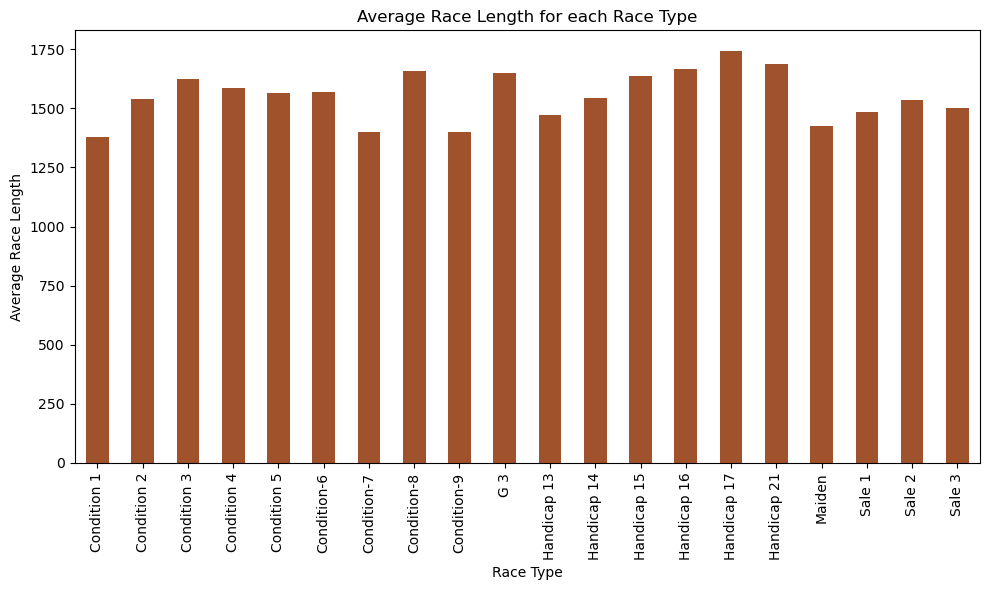

In [250]:
#What is the average race length for each race type? 
unique_races = clean.drop_duplicates(subset=['race_date', 'race_city', 'race_no'])
avg_race_length = unique_races.groupby('race_type')['race_length'].mean()

#Create a bar plot for average race length by race type
plt.figure(figsize=(10, 6))
avg_race_length.plot(kind='bar', color='sienna')
plt.title('Average Race Length for each Race Type')
plt.xlabel('Race Type')
plt.ylabel('Average Race Length')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [159]:
#Are there specific race types where certain horses or jockeys perform particularly well?
#Get the 1st place performers for each race type
first_winners = clean[clean['result'] == 1]

#Jockey win count
#Group by race type and jockey name, and count the occurrences within each race type
jockey_counts_by_race_type = first_winners.groupby(['race_type', 'jockey_name']).size().reset_index()

#Find the jockey with the most 1st place wins in each race type
top_jockey_by_race_type = jockey_counts_by_race_type.groupby('race_type').apply(lambda x: x.loc[x[0].idxmax()])

#Drop the duplicate 'race_type' column
top_jockey_by_race_type = top_jockey_by_race_type.drop(columns='race_type')

#Rename column 0
top_jockey_by_race_type = top_jockey_by_race_type.rename(columns={0: 'win count'})
top_jockey_by_race_type

,jockey_name,win count
race_type,,
Condition 1,AYHAN KURŞUN,2
Condition 2,HIŞMAN ÇİZİK,3
Condition 3,AKIN SÖZEN,4
Condition 4,NEVZAT AVCİ,4
Condition 5,AHMET ÇELİK,3
Condition-6,ERCAN ÇANKAYA,4
Condition-7,MÜSLÜM ÇELİK,1
Condition-8,MEHMET KAYA,3
Condition-9,ÖZCAN YILDIRIM,1


In [160]:
#Horse win count
#Group by race type and jockey name, and count the occurrences within each race type
horse_counts_by_race_type = first_winners.groupby(['race_type', 'horse_name']).size().reset_index()

#Find the horse with the most 1st place wins in each race type
top_horses_by_race_type = horse_counts_by_race_type.groupby('race_type').apply(lambda x: x.loc[x[0].idxmax()])

#Drop the duplicate 'race_type' column
top_horses_by_race_type = top_horses_by_race_type.drop(columns='race_type')

#Rename column 0
top_horses_by_race_type = top_horses_by_race_type.rename(columns={0: 'win count'})
top_horses_by_race_type

,horse_name,win count
race_type,,
Condition 1,ASTAMUR,1
Condition 2,ALACAATLI,1
Condition 3,AKINCI,1
Condition 4,DÜNDARZADE,2
Condition 5,AKATAHAN,1
Condition-6,ALTUĞBEY,1
Condition-7,MIND AND LIFE,1
Condition-8,WARDENCLYFFE,2
Condition-9,HALİM AĞA,1


In [252]:
#What are the most common track conditions?
common_track_conditions = unique_races.groupby(['race_track_condition']).size()
common_track_conditions


race_track_condition
Good Going    376
Moist          67
Muddy           8
Wet            29
dtype: int64

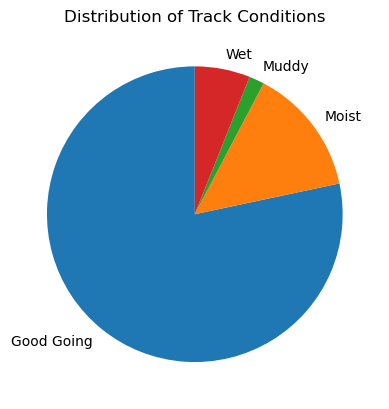

In [253]:
#Plot common track conditions
#Extract common track condition labels for the chart
track_conditions = common_track_conditions.index.tolist()

#Plot the pie chart with track condition labels
plt.pie(common_track_conditions, labels=track_conditions, startangle=90)
plt.title('Distribution of Track Conditions')
plt.show()


In [211]:
#How do track conditions impact race outcomes?
#Do certain horses or jockeys perform better in specific track conditions?
#Group by race track condition and jockey name and count the occurrences within each condition
jockey_counts_by_condition = first_winners.groupby(['race_track_condition', 'jockey_name']).size().reset_index()

#Find the jockey with the most 1st place wins in each condition
top_jockey_by_condition = jockey_counts_by_condition.groupby('race_track_condition').apply(lambda x: x.loc[x[0].idxmax()])

#Drop the duplicate 'race_track_condition' column
top_jockey_by_condition = top_jockey_by_condition.drop(columns='race_track_condition')

#Rename column 0
top_jockey_by_condition = top_jockey_by_condition.rename(columns={0: 'win count'})
top_jockey_by_condition

,jockey_name,win count
race_track_condition,,
Good Going,VEDAT ABİŞ,25
Moist,NEVZAT AVCİ,4
Muddy,AHMET ÇELİK,1
Wet,FESİH ÇETİNBAŞ,4


In [257]:
#Do certain horses or jockeys perform better in specific track conditions?
#Group by race track condition and horse name and count the occurrences within each condition
horse_counts_by_condition = first_winners.groupby(['race_track_condition', 'horse_name']).size().reset_index()

#Find the jockey with the most 1st place wins in each condition
top_horse_by_condition = horse_counts_by_condition.groupby('race_track_condition').apply(lambda x: x.loc[x[0].idxmax()])

#Drop the duplicate 'race_track_condition' column
top_horse_by_condition = top_horse_by_condition.drop(columns='race_track_condition')

#Rename column 0
top_horse_by_condition = top_horse_by_condition.rename(columns={0: 'win count'})
top_horse_by_condition

,horse_name,win count
race_track_condition,,
Good Going,ADAPINAR,2
Moist,CESİ AFFETMEZ,2
Muddy,BAY TAYLAN,1
Wet,ANADOLU EDASI,2


In [214]:
#How does the distribution of race lengths vary by track type?
#Calculate the count of races for each track type and race length
race_length_distribution = unique_races.groupby(['race_track_type', 'race_length']).size().unstack(fill_value=0)
race_length_distribution

race_length,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200
race_track_type,,,,,,,,,,,
Dirt,58,33,127,11,20,12,17,48,31,13,4
Dirt (Polytrack),14,9,25,24,1,7,0,0,15,8,3


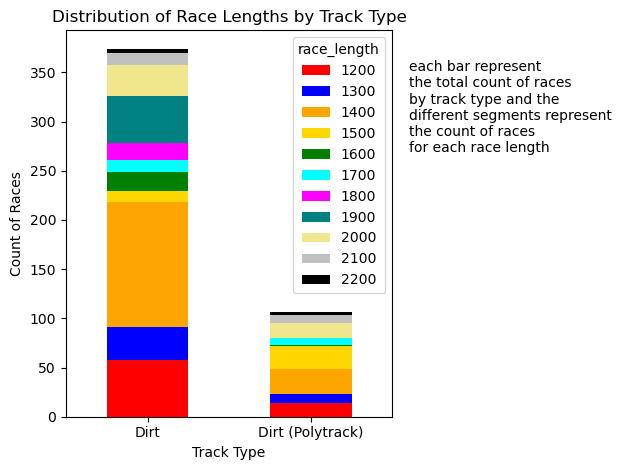

In [215]:
#Plot the race length distribution
race_length_distribution.plot(kind='bar', stacked=True, color=['red', 'blue', 'orange', 'gold', 'green', 'cyan', 'magenta', 'teal', 'khaki', 'silver', 'black'])

#Comment next to the bar chart
plt.text(1.05, 0.8, 'each bar represent\nthe total count of races\nby track type and the\ndifferent segments represent\nthe count of races\nfor each race length', horizontalalignment='left', verticalalignment='center', rotation=0, transform=plt.gca().transAxes, fontsize=10, color='black')

plt.title('Distribution of Race Lengths by Track Type')
plt.xlabel('Track Type')
plt.ylabel('Count of Races')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [255]:
#How do race outcome vary across different race lengths and track types?
jockey_wins_by_race = first_winners.groupby(['race_length', 'race_track_type', 'jockey_name']).size().reset_index()

#Find the horse with the most wins in each race length and track type combination
top_jockey_by_race = jockey_wins_by_race.groupby(['race_length', 'race_track_type']).apply(lambda x: x.loc[x[0].idxmax()])

#Rename column 0
top_jockey_by_race = top_jockey_by_race.rename(columns={0: 'win count'})

#Reset index to remove redundant columns
top_jockey_by_race.reset_index(drop=True, inplace=True)
top_jockey_by_race

,race_length,race_track_type,jockey_name,win count
0,1200,Dirt,AHMET ÇELİK,4
1,1200,Dirt (Polytrack),MEHMET KAYA,3
2,1300,Dirt,MEHMET SALİH ÇELİK,3
3,1300,Dirt (Polytrack),VEDAT ABİŞ,3
4,1400,Dirt,AHMET ÇELİK,7
5,1400,Dirt (Polytrack),MEHMET KAYA,4
6,1500,Dirt,HIŞMAN ÇİZİK,2
7,1500,Dirt (Polytrack),VEDAT ABİŞ,5
8,1600,Dirt,NEVZAT AVCİ,4
9,1600,Dirt (Polytrack),AYHAN KURŞUN,1
